## SYRIATEL CUSTOMER CHURN MACHINE LEARNING PROJECT

For this project, I have used CRISP-DM framework in its data science process

## 1. BUSINESS UNDERSTANDING

### 1.1 The audience

The audience for the study will be the SyriaTel, a telecom business itself, interested in reducing how much money is lost because of customers who don't stick around very long. 

### 1.2 Business Problem

SyriaTel communication company is in need of a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. This is a binary classification problem. Detecting customers who are likely to leave and putting retention plans in place to keep them are the primary business challenges. The company wants to reduce revenue loss by lowering turnover of customers.


### 1.3 Scope

The scope of the project include:

- Establishing if there are any predictable patterns whether a customer will ("soon") stop doing business with SyriaTel.

- Developing a predictive model to identify customers at risk of churning.

- Providing actionable insights for customer retention strategies.

#### 1.4 Data Source

The Churn in Telecom's dataset was sourced from:
https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

In [759]:
# importing revelant libraries
import pandas as pd
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm


from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix,ConfusionMatrixDisplay,classification_report, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier


## 2. DATA UNDERSTANDING

### 2.1 Data Description and Quality

#### Load the dataset

In [760]:
df=pd.read_csv("./Data/bigml_59c28831336c6604c800002a.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- The top five rows of this table contain all 21 data columns. Information about a customer is represented by each row, including the state, account information, charges, call usage, and whether or not the consumer churned (churn column).

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

- The data structure of a dataset has 21 columns and 3,333 entries.

- The data shows the dataset contains both numerical and categorical information about the phone plans, usage patterns, and turnover rate of the customers.

- The dataset's data types contain four object (string)-type columns, eight integer-type (int64) columns, eight float-type (float64) columns, and one boolean-type column.

- There are no missing values in the dataset, hence, not necessary to pursue any further cleaning to fill any missing values in the dataset.

In [762]:
# Check the shape of the dataset
print("The dataset shape is {}".format(df.shape))

The dataset shape is (3333, 21)


#### Summary statistics for the numeric columns in the DataFrames

In [763]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Summary of the statistics for the selected numerical columns in the dataset is as shared below:

- All the numerical columns have no nulls in the 3,333 rows

- The average number of voicemail messages per customer is 8.1 and Standard deviation of 13.69.

- The average total daytime minutes per customer is 179.77 while the maximum total day minutes is 350.8. The Standard deviation of total daytime minutes was 54.47 minutes.

- The average number of daytime calls per customer is 100.44 with the maximum at 165 daytime calls.

- The average charge for daytime calls is 30.56 dollars while the maximum charge for daytime calls at $59.64.

- The average charge for evening calls is 17.08 dollars with the maximum charge for evening calls at $30.91.

- The average total evening minutes per customer is 200.98 while the maximum total evening minutes is 363.7.

- The average number of evening calls per customer is 100.11 with a standard deviation of 19.92 calls. The maximum number of evening calls is 170.



### 2.2 Exploratory Data Analysis (EDA)

#### Visualise distribution of Numerical Features in the DataFrame

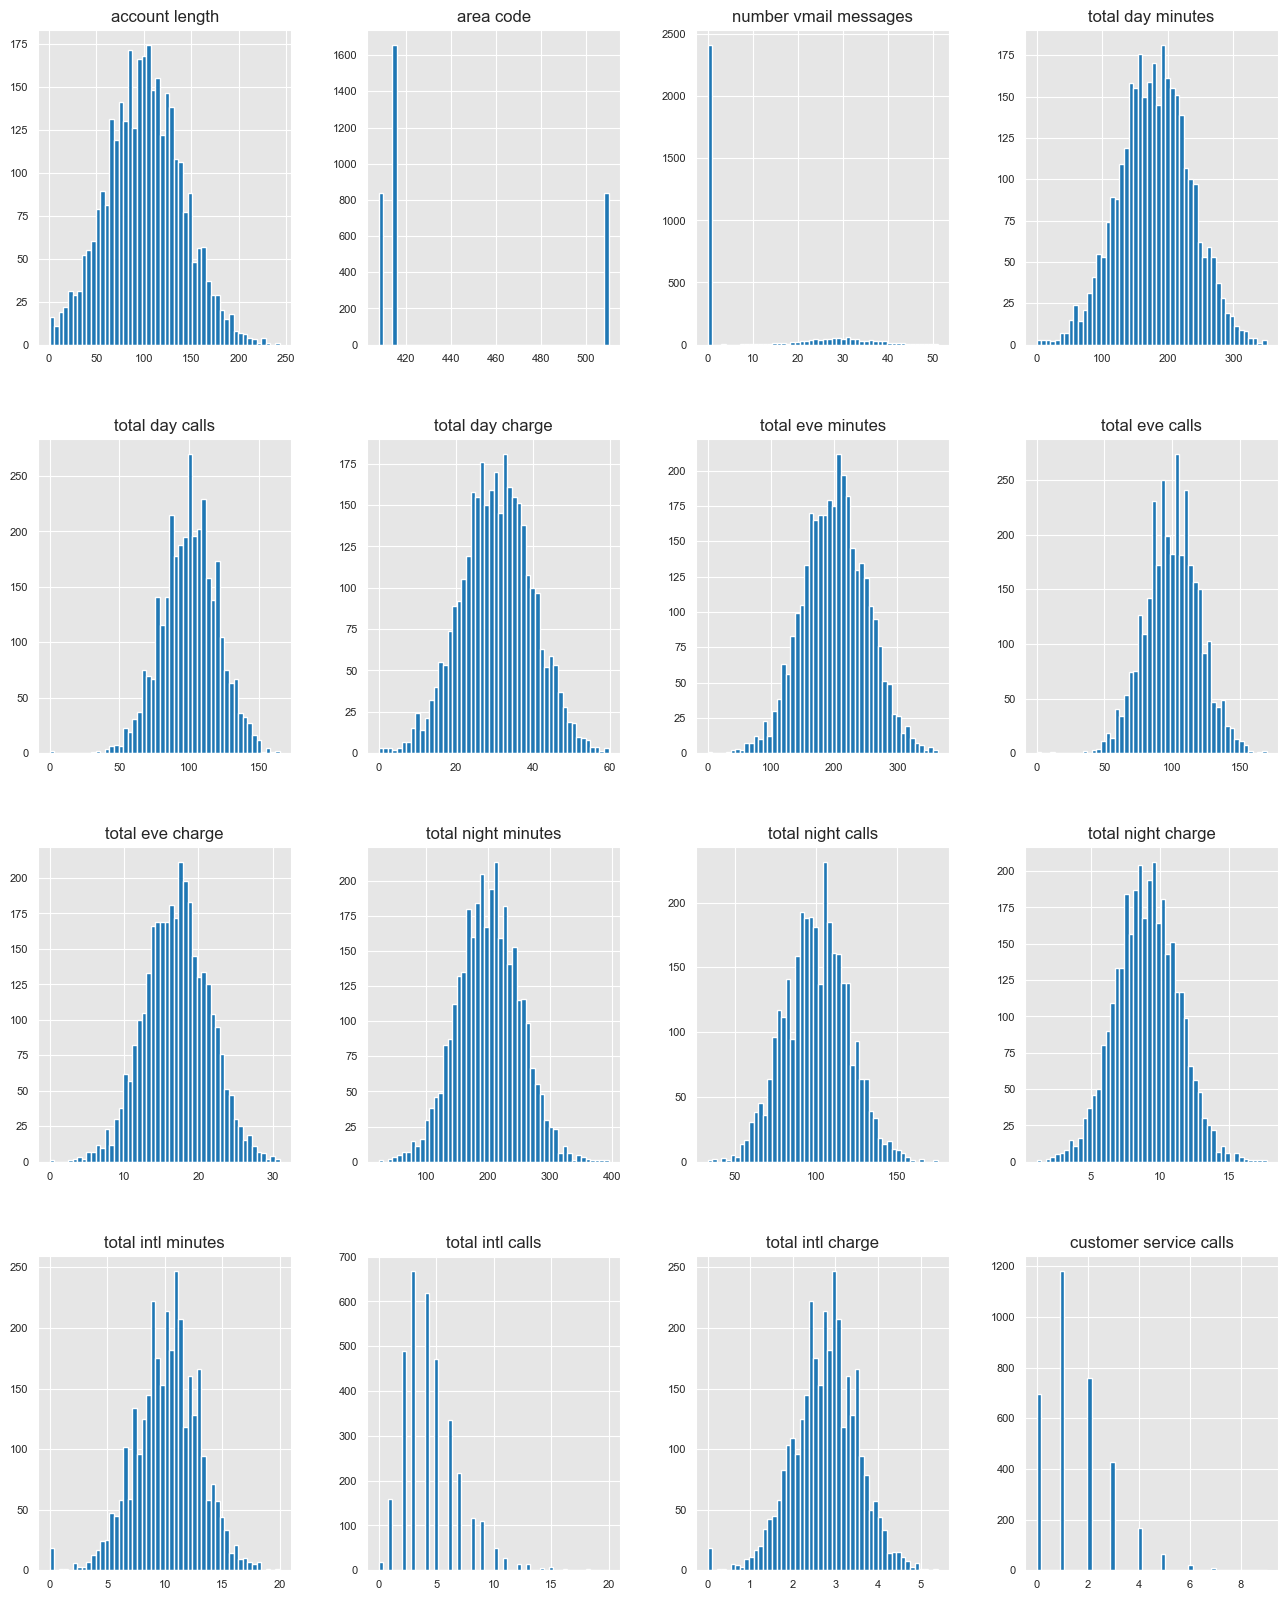

In [764]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Below is the summary of the distribution of the numerical columns:

- The distribution of the account length, total day calls, total day minutes, total day charge, total evening minutes, total evening calls, total evening charge, total night minutes, total night calls, total night charge, total international minutes and total international charge all appear to be normal. 

- Total International Calls, Number of Voicemail Messages and Customer Service Calls have have distribution highly skewed to the right.

- Three distinct peaks in the Area Code histogram around 408, 415, and 510.



#### Converting area code to categorical

Considering area code column values as numerical may not mean much as the codes represent a specific area and hence, should be converted to text.

In [765]:
df["area code"]=df["area code"].astype("str")
df.dtypes

state                      object
account length              int64
area code                  object
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

### Check for multicollinearity

In [766]:
# Establish the numerical columns
numericals=df.select_dtypes(include=["int64", "float64"])
nums_cols= add_constant(df[numericals.columns])

# Calculate the variance inflation factor (VIF)
vif_data = pd.DataFrame() 
vif_data['feature'] = nums_cols.columns 
vif_data['VIF'] = [variance_inflation_factor(nums_cols.values, i) for i in range(nums_cols.shape[1])] 

# Display VIF 
print(vif_data)

                   feature           VIF
0                    const  1.429478e+02
1           account length  1.003077e+00
2    number vmail messages  1.001838e+00
3        total day minutes  1.047422e+07
4          total day calls  1.004647e+00
5         total day charge  1.047423e+07
6        total eve minutes  2.236931e+06
7          total eve calls  1.002284e+00
8         total eve charge  2.236932e+06
9      total night minutes  6.387152e+05
10       total night calls  1.002143e+00
11      total night charge  6.387138e+05
12      total intl minutes  6.901650e+04
13        total intl calls  1.003184e+00
14       total intl charge  6.901718e+04
15  customer service calls  1.001816e+00


The following features have low variance inflation factor(VIF) indicating that they may not cause multicollinearity. The include:

 - Account Length, 
 - Number Vmail Messages
- Total Day Calls
- Total Eve Calls
- Total Night Calls
- Total Intl Calls  
- Customer Service Calls

The features below have high variance inflation factor (VIF), hence, indicating that they are highly correlated with each other. Specifically:

- Total Day Minutes 
- Total Day Charge  
- Total Eve Minutes  
- Total Eve Charge  
- Total Night Minutes  
- Total Night Charge  
- Total Intl Minutes  
- Total Intl Charge  


### Addressing possible multicollinearity

In [767]:
# Drop the highly correlated features
df = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


The remaining columns are 17 after removing columns that may cause multicollinearity.

In [768]:
# # Visualise a pairplot for all columns with numerical values in the DataFrame
# sns.pairplot(df, hue='churn', kind='scatter')

# #Show the plot
# plt.show()

In [769]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False


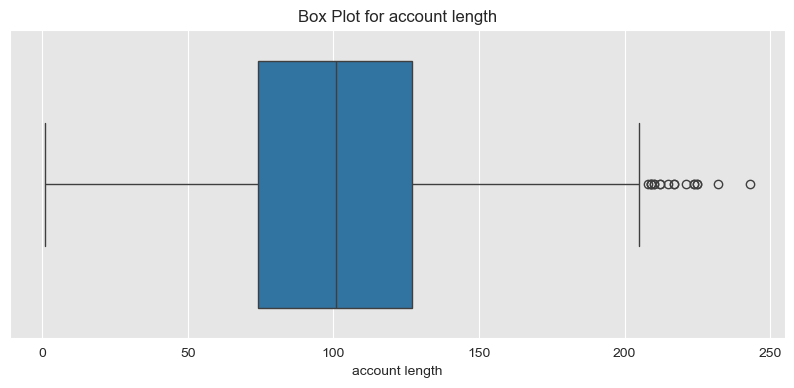

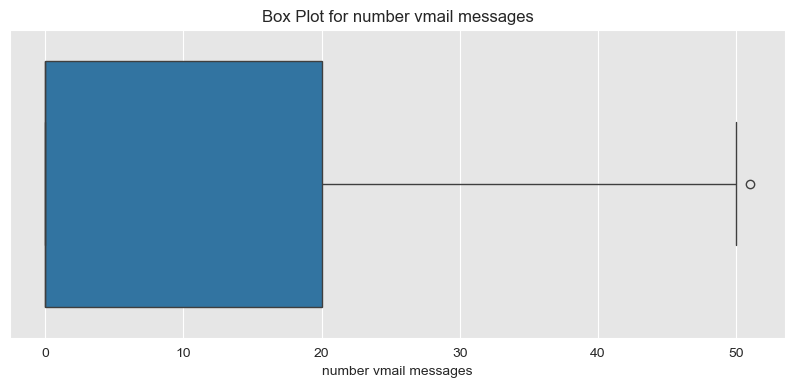

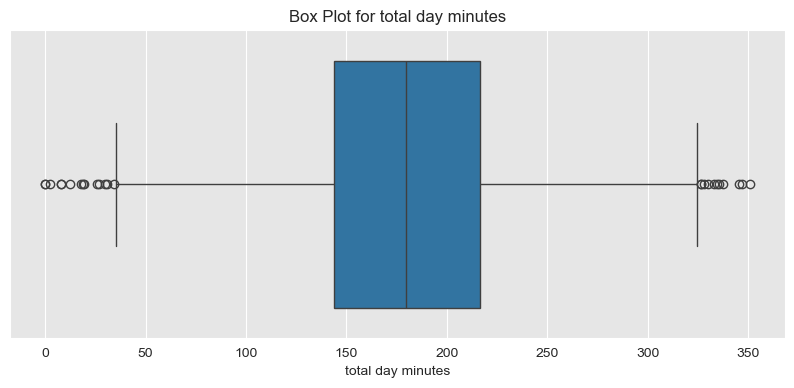

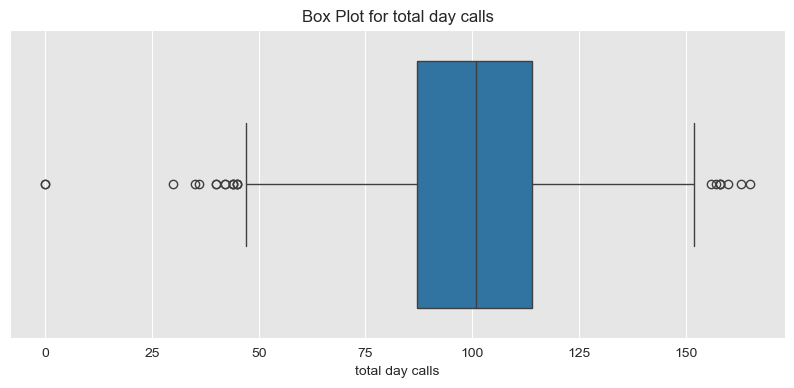

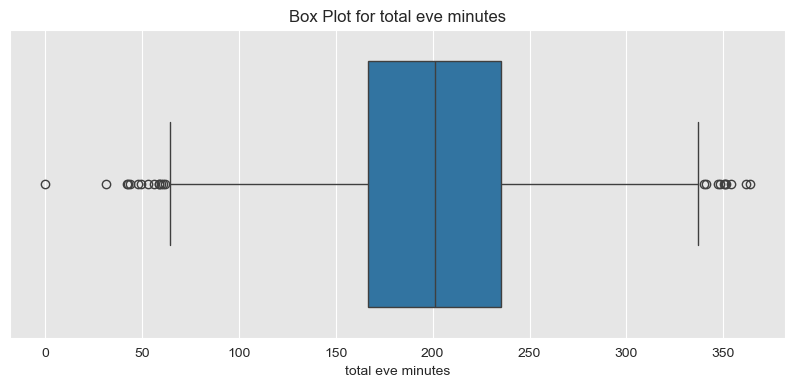

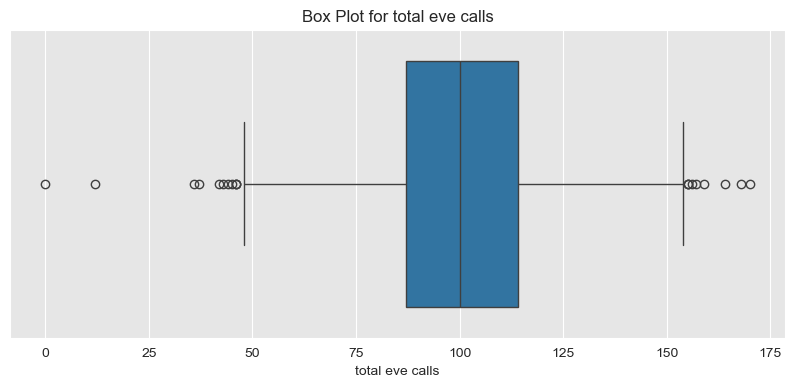

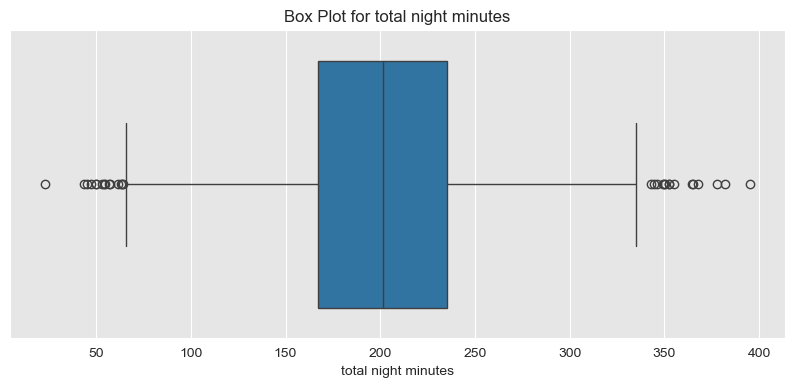

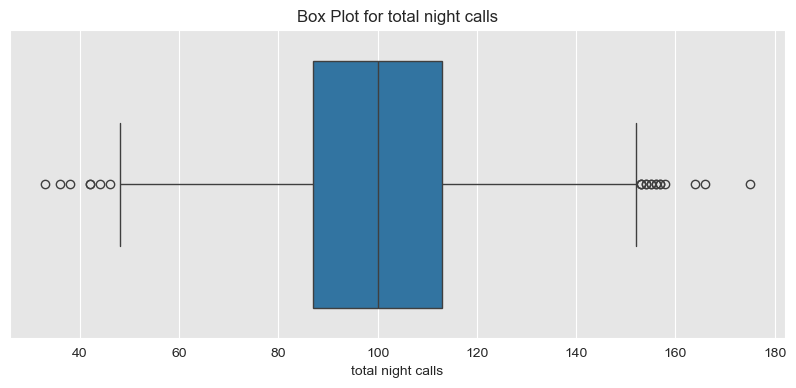

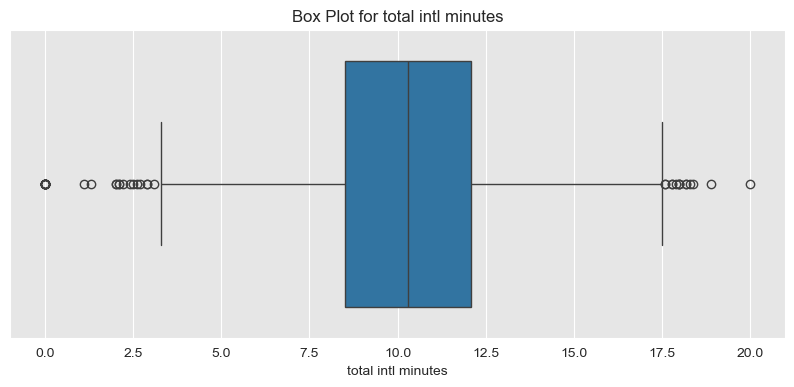

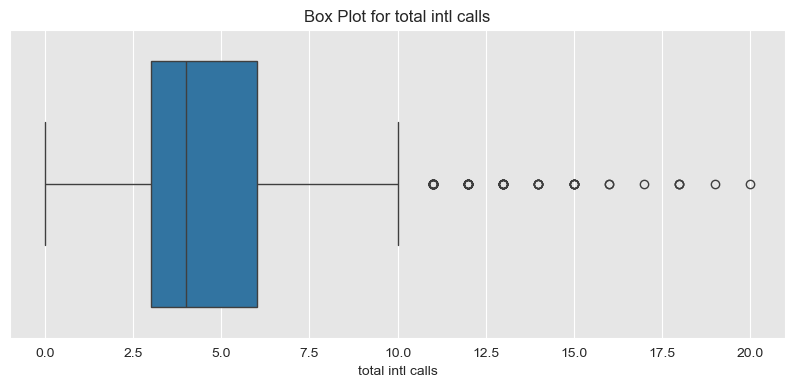

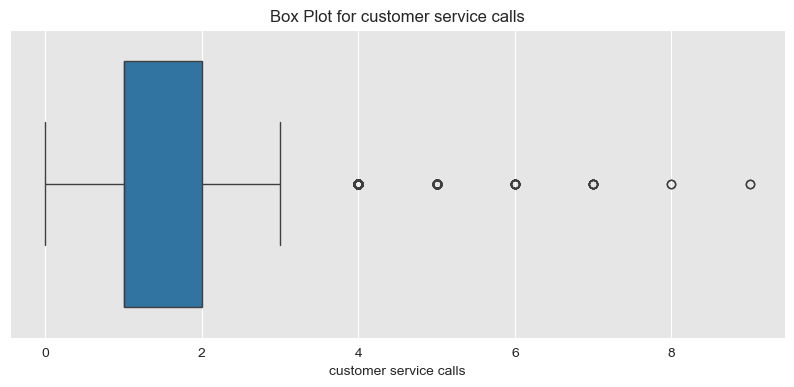

In [774]:
# Numerical columns
numerical_cols_bplot = df.select_dtypes(include=[np.number]).columns.tolist()

# Create box plots for each numerical column
for col in numerical_cols_bplot:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()



#### Correlation analysis

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

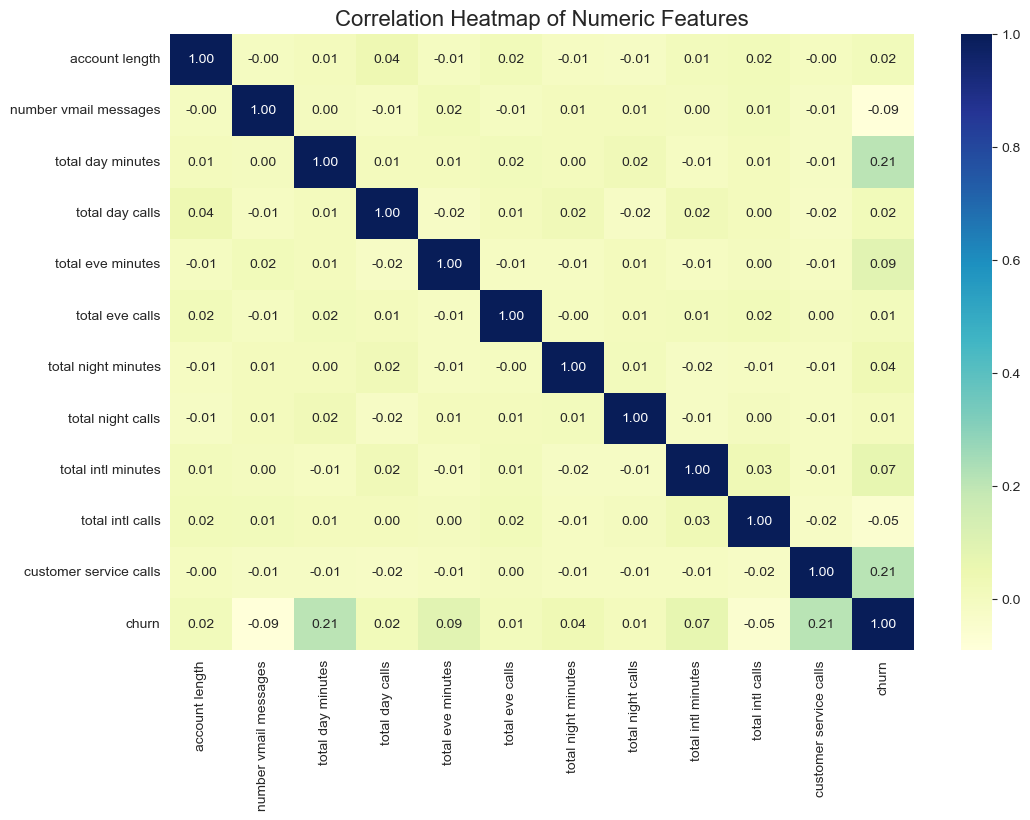

In [ ]:
# Compute correlation for all numeric columns in DataFrames
corr_trained = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_trained,annot=True,cmap="YlGnBu", fmt=".2f");

#  to the heatmap
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)

- There is a perfect correlation between total day charge and total minutes, and between total nighttime charge and total minutes. 

- There is a moderately positive (0.21) correlation between the churn feature and the total number of minutes, charges, and customer support calls for the day. This suggests that customers are more likely to churn if they make more customer service calls and spend more time on calls throughout the day.

- There is a small negative correlation (-0.09) between the quantity of voicemail messages and churn, indicating that customers who use voicemail less frequently are somewhat more likely to churn.

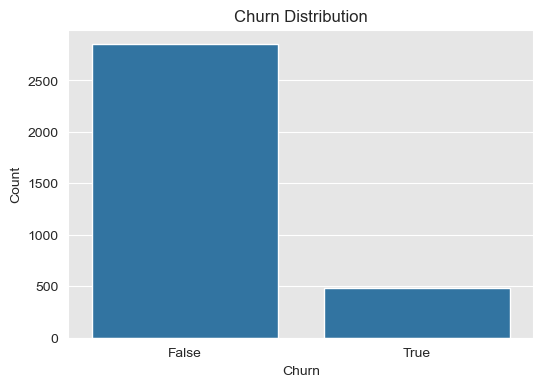

In [ ]:
y = df["churn"].value_counts()

# Convert to a pandas DataFrame
churn_df = pd.DataFrame(list(y.items()), columns=['Churn', 'Count'])

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Churn', y='Count', data=churn_df)

# Titles and labels
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show the plot
plt.show()


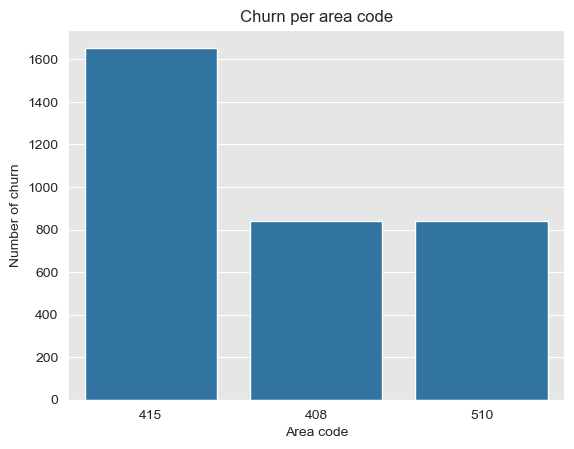

In [707]:
# Visualise distribution of churn per area code
sns.countplot(data=df, x="area code")

# titles
plt.title('Churn per area code')
plt.xlabel('Area code')
plt.ylabel('Number of churn')

plt.show()

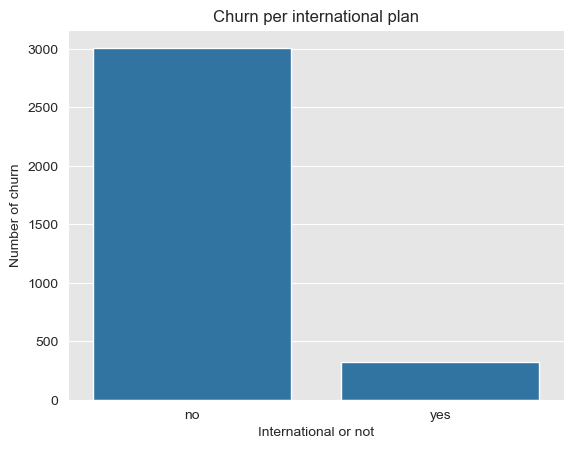

In [708]:
# Visualise distribution of churn per international plan
sns.countplot(data=df, x="international plan")

# titles
plt.title('Churn per international plan')
plt.xlabel('International or not')
plt.ylabel('Number of churn')

plt.show()

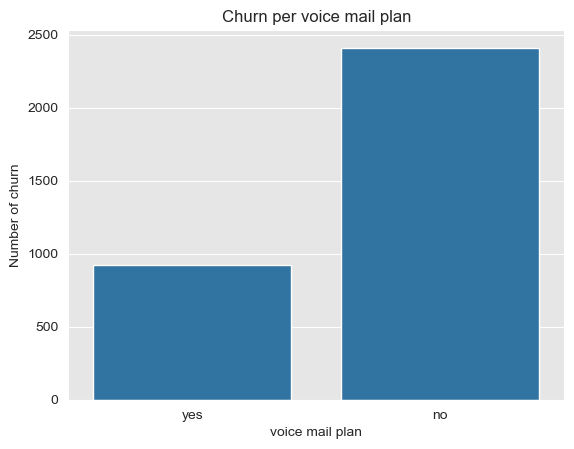

In [ ]:
# Visualise distribution of churn per voice mail plan
sns.countplot(data=df, x="voice mail plan")

# titles
plt.title('Churn per voice mail plan')
plt.xlabel('voice mail plan')
plt.ylabel('Number of churn')

plt.show()

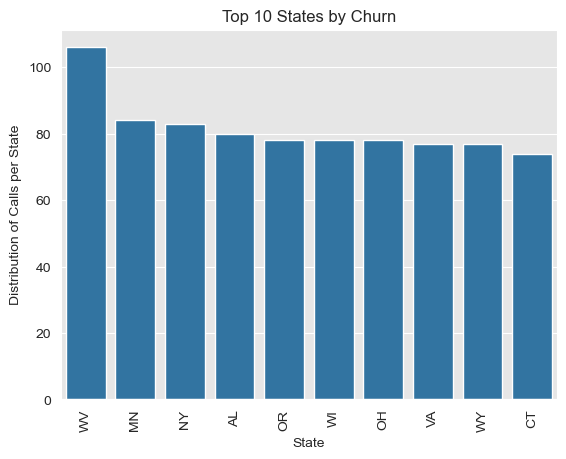

In [ ]:
# Aggregate calls
state_counts = df.groupby('state').size().sort_values(ascending=False).reset_index(name='counts')

# Select the top 10 states
top_10_states = state_counts.head(10)

# Plot distribution of calls per state ordered by counts
sns.barplot(x='state', y='counts', data=top_10_states)

# Titles
plt.title('Top 10 States by Churn')
plt.xlabel('State')
plt.ylabel('Distribution of Calls per State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()


## 3. DATA PREPARATION

During this stage, I handled the following steps:

- Split data to train and test
- Data type conversions (e.g. numeric data mistakenly encoded as strings)
- Checking for and removing multicollinearity (correlated predictors)
- Normalizing our numeric data
- Converting categorical data to numeric format through one-hot encoding


### Identifying Predictors and Target

In [ ]:
# drop the phone number since it might not affect the prediction.

cols_to_drop = ['phone number']
df_cleaned = df.drop(cols_to_drop,axis=1)
df_cleaned

# Predictors represented by X and the target represented by y
X = df_cleaned.drop("churn",axis=1)
y = df_cleaned["churn"]
X

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,WV,68,415,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,RI,28,510,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,CT,184,510,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2


#### Split the dataset into train and test

In [ ]:
# Create train and test data using random_state=42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# output
print(f"The shape for the X_train dataset is: {', '.join(map(str, X_train.shape))}.")
print(f"The shape for the y_train dataset is: {', '.join(map(str, y_train.shape))}.")
print(f"The shape for the X_test dataset is: {', '.join(map(str, X_test.shape))}.")
print(f"The shape for the y_test dataset is: {', '.join(map(str, y_test.shape))}.")

The shape for the X_train dataset is: 2666, 15.
The shape for the y_train dataset is: 2666.
The shape for the X_test dataset is: 667, 15.
The shape for the y_test dataset is: 667.


#### Identify numerical and categorical columns in the datasets

In [713]:
# Establish the numerical columns in the X_train and X_test dataset
X_train_num_cols = X_train.select_dtypes(include=["int64", "float64"]).copy()
X_test_num_cols = X_test.select_dtypes(include=["int64", "float64"]).copy()
X_train_categorical_cols = X_train.select_dtypes(include=["object"]).copy()
X_test_categorical_cols = X_test.select_dtypes(include=["object"]).copy()

# print out the categorical columns in the dataset
print(f"The numerical columns in the X_train dataset are:{','.join(X_test_num_cols)}.")
print(f"The numerical columns in the X_test dataset are: {', '.join(X_test_num_cols)}.")
print(f"The categorical columns in the X_train dataset are: {', '.join(X_train_categorical_cols)}.")
print(f"The categorical columns in the X_test dataset are: {', '.join(X_test_categorical_cols)}.")



The numerical columns in the X_train dataset are:account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls.
The numerical columns in the X_test dataset are: account length, number vmail messages, total day minutes, total day calls, total eve minutes, total eve calls, total night minutes, total night calls, total intl minutes, total intl calls, customer service calls.
The categorical columns in the X_train dataset are: state, area code, international plan, voice mail plan.
The categorical columns in the X_test dataset are: state, area code, international plan, voice mail plan.


#### Scale numerical predictors using `MinMaxScaler`

In [714]:
# Initializes the Scaler:
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train_num_cols)  

# Transform the numerical columns in the dataset
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_num_cols),
    index=X_train_num_cols.index,
    columns=X_train_num_cols.columns
)

X_train_scaled

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
817,1.000000,0.000000,0.266801,0.459259,0.450096,0.370588,0.648198,0.598592,0.330,0.315789,0.222222
1373,0.442149,0.000000,0.314187,0.555556,0.532582,0.647059,0.499462,0.422535,0.205,0.210526,0.444444
679,0.305785,0.000000,0.631246,0.355556,0.899093,0.652941,0.497041,0.500000,0.435,0.473684,0.111111
56,0.578512,0.000000,0.356979,0.503704,0.494913,0.364706,0.316299,0.669014,0.400,0.105263,0.111111
1993,0.351240,0.000000,0.613728,0.488889,0.732197,0.452941,0.513179,0.542254,0.225,0.157895,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.433884,0.000000,0.780586,0.666667,0.546054,0.482353,0.370091,0.204225,0.300,0.157895,0.111111
1130,0.500000,0.000000,0.093337,0.237037,0.497113,0.523529,0.614309,0.176056,0.635,0.105263,0.111111
1294,0.268595,0.000000,0.244113,0.340741,0.720374,0.652941,0.434104,0.647887,0.460,0.263158,0.111111
860,0.694215,0.000000,0.507180,0.600000,0.481716,0.764706,0.552448,0.415493,0.495,0.315789,0.222222


In [ ]:
# Initializes the Scaler:
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_test_num_cols)  

# Transform the nuerical columns in the dataset
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_num_cols),
    index=X_test_num_cols.index,
    columns=X_test_num_cols.columns
)

X_test_scaled

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
438,0.500000,0.000000,0.461997,0.588608,0.965495,0.500000,0.449691,0.669231,0.714286,0.15,0.142857
2674,0.294643,0.000000,0.325186,0.740506,0.600451,0.655172,0.446605,0.807692,0.677249,0.30,0.000000
1345,0.433036,0.000000,0.000000,0.000000,0.414060,0.706897,0.380864,0.400000,0.359788,0.05,0.571429
1957,0.651786,0.000000,0.634277,0.500000,0.557562,0.370690,0.347222,0.592308,0.539683,0.10,0.142857
2148,0.424107,0.000000,0.429210,0.645570,0.623992,0.215517,0.567901,0.423077,0.529101,0.35,0.142857
...,...,...,...,...,...,...,...,...,...,...,...
2577,0.696429,0.000000,0.551714,0.582278,0.586262,0.318966,0.470370,0.376923,0.449735,0.25,0.285714
2763,0.513393,0.413043,0.464083,0.658228,0.497259,0.603448,0.459877,0.615385,0.433862,0.10,0.428571
3069,0.656250,0.565217,0.473025,0.575949,0.416962,0.681034,0.538889,0.400000,0.523810,0.15,0.142857
1468,0.330357,0.586957,0.350224,0.645570,0.566269,0.681034,0.465123,0.600000,0.222222,0.35,0.428571


#### Transform categorical features

In [716]:
# Establish the categorical columns in the X_train dataset
X_train_categorical_cols = X_train.select_dtypes(include=["object"]).copy()
X_train_categorical_cols



,state,area code,international plan,voice mail plan
817,UT,510,no,no
1373,SC,415,no,no
679,TX,415,yes,no
56,CO,415,no,no
1993,IN,510,no,no
...,...,...,...,...
1095,ID,510,no,no
1130,PA,415,no,no
1294,OR,408,no,no
860,HI,415,no,no


In [717]:
ohe = OneHotEncoder(handle_unknown='ignore') 
X_train_ohe = ohe.fit_transform(X_train_categorical_cols)
X_test_ohe = ohe.transform(X_test_categorical_cols)

In [718]:
#  Initializes OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# fit the encoder to the categorical columns in X_train
ohe.fit(X_train_categorical_cols)

# Transform the data and create a DataFrame
X_train_ohe = pd.DataFrame(
    ohe.transform(X_train_categorical_cols),
    index=X_train_categorical_cols.index,
    columns=np.hstack(ohe.categories_)
)
# Output
X_train_ohe


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,WI,WV,WY,408,415,510,no,yes,no,yes
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
56,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [719]:
#  Initializes OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# fit the encoder to the categorical columns in X_test
ohe.fit(X_test_categorical_cols)

# Transform the data and create a DataFrame
X_test_ohe = pd.DataFrame(
    ohe.transform(X_test_categorical_cols),
    index=X_test_categorical_cols.index,
    columns=np.hstack(ohe.categories_)
)
# Output
X_test_ohe

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,WI,WV,WY,408,415,510,no,yes,no,yes
438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


#### Concatenate the X_train and X_test dataset

In [720]:
# Combine the scaled numeric features with the one-hot encoded categorical features for both X_train and X_test
X_train_new = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_new = pd.concat([X_test_scaled, X_test_ohe], axis=1)

print(X_train_new.shape)
print(X_test_new.shape)  

(2666, 69)
(667, 69)


## 4. MODELLING

I considered the following questions during the modeling step:

- Is this a classification task? A regression task? Something else?
- What models will we try?
- How do we deal with overfitting?
- Do we need to use regularization or not?
- What sort of validation strategy will we be using to check that our model works well on unseen data?
- What loss functions will we use?
- What threshold of performance do we consider as successful?

#### A) Logistic Regression model

In [721]:

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

model_log = logreg.fit(X_train_new, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

#### B) Decision Tree Classifier

##### Train the decision tree

In [722]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy')

##### Plot the decision tree

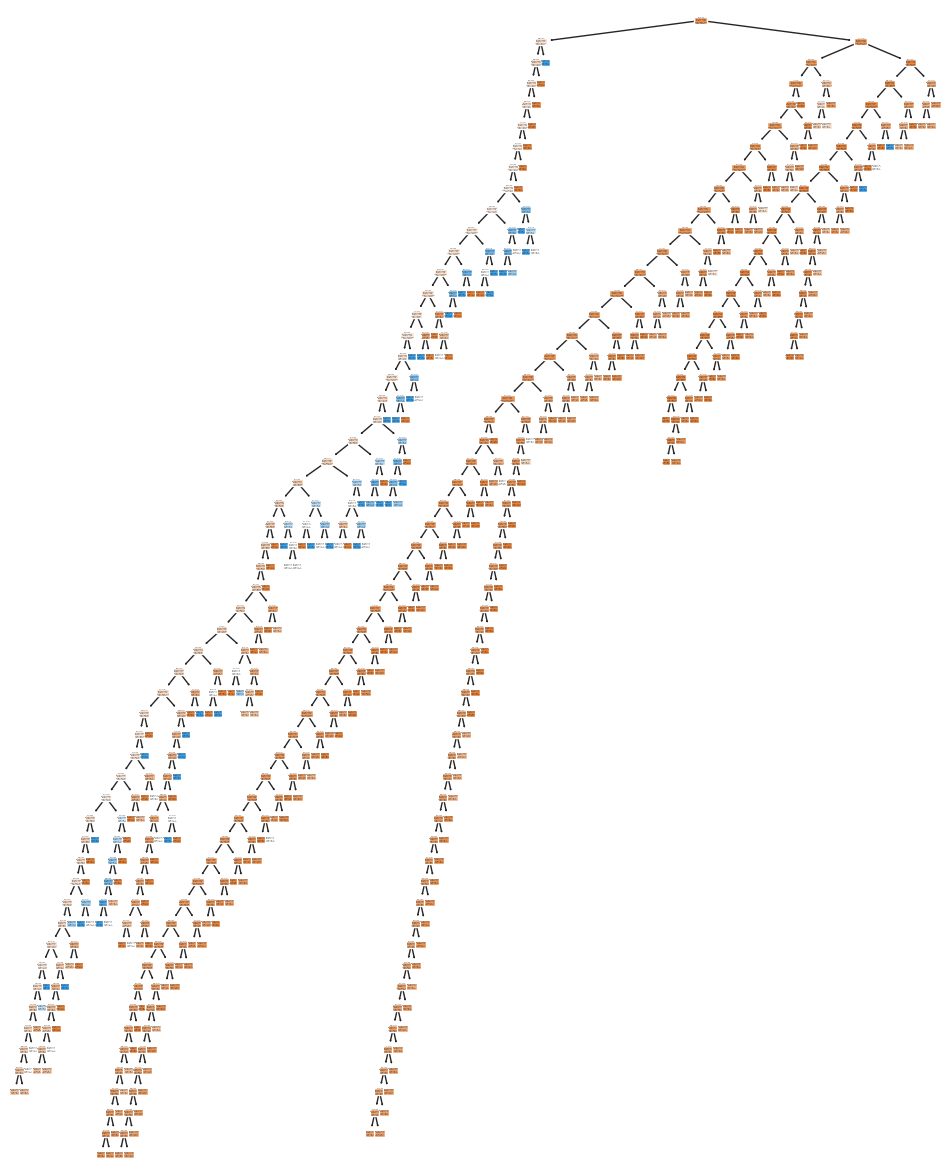

In [723]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (12,15))
tree.plot_tree(clf,
               feature_names = X_train_ohe.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [724]:
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))

Accuracy:  0.8350824587706147


The proportion of correct predictions out of all predictions on the test dataset made by the model was approximately 83.66%.

In [ ]:
classifier=DecisionTreeClassifier(random_state=42)
classifier = classifier.fit(X_train_new, y_train)
churn_predicted_target=classifier.predict(X_test_new)
score = classifier.score(X_test_new, y_test)
print('Decision Tree Classifier : ',score)
print('Confusion Matrix',confusion_matrix(y_test,churn_predicted_target))
print(classification_report(y_test, churn_predicted_target))

Decision Tree Classifier :  0.8575712143928036
Confusion Matrix [[495  71]
 [ 24  77]]
              precision    recall  f1-score   support

       False       0.95      0.87      0.91       566
        True       0.52      0.76      0.62       101

    accuracy                           0.86       667
   macro avg       0.74      0.82      0.77       667
weighted avg       0.89      0.86      0.87       667



#### C) Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

classifier_rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10,random_state=42)
classifier_rf = classifier_rf.fit(X_train_new, y_train)
churn_predicted_target=classifier_rf.predict(X_test_new)
score = classifier_rf.score(X_test_new, y_test)
print('Random Forest Classifier : ',score)
print('Accuracy Score',accuracy_score(y_test,churn_predicted_target))  
print('Confusion Matrix',confusion_matrix(y_test,churn_predicted_target))
print(classification_report(y_test, churn_predicted_target))

Random Forest Classifier :  0.8770614692653673
Accuracy Score 0.8770614692653673
Confusion Matrix [[563   3]
 [ 79  22]]
              precision    recall  f1-score   support

       False       0.88      0.99      0.93       566
        True       0.88      0.22      0.35       101

    accuracy                           0.88       667
   macro avg       0.88      0.61      0.64       667
weighted avg       0.88      0.88      0.84       667



## 5. EVALUATION AND VALIDATION

- During this step, we'll evaluate the results of our modeling efforts. Does our model solve the problems that we outlined all the way back during step 1.
- Generate Predictions on Training and Test Sets

#### A) Performance of logistic regression on training and test data

##### Performance of logistic regression on training data

In [ ]:
y_hat_train = logreg.predict(X_train_new).astype(int)

# Calculate the residuals
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    2322
1     344
Name: count, dtype: int64

Residuals (proportions)
0    0.870968
1    0.129032
Name: proportion, dtype: float64


The model's accuracy on the training data is 87.09%, meaning that most of its predictions are accurate.

##### Performance of logistic regression on test data

In [728]:
y_hat_test = logreg.predict(X_test_new).astype(int)

# Calculate the residuals
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(test_residuals, name="Residuals (proportions)").value_counts(normalize=True))

Residuals (counts)
0    569
1     98
Name: count, dtype: int64

Residuals (proportions)
0    0.853073
1    0.146927
Name: proportion, dtype: float64


The model's accuracy on the test data is 85.31%, meaning that most of its predictions are accurate but slightly lower than the predicted values for the training data, which is at 87.09%.

#### B) Calculate the precision, recall, accuracy, and F1 score of the classifier 

#### Write a function to calculate the precision

In [729]:
def precision(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fp = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 1])
    return tp / float(tp + fp)

#### Write a function to calculate the recall

In [730]:
def recall(y, y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp + fn)

#### Write a function to calculate the accuracy

In [731]:
def accuracy(y, y_hat):
    # Could also use confusion matrix
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))

#### Write a function to calculate the F1 score

In [732]:
def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [ ]:
# Calculate the precision, recall, accuracy, and F1 score of the classifier 
y_hat_train = logreg.predict(X_train_new)
y_hat_test = logreg.predict(X_test_new)

print('Training Precision: ', precision(y_train, y_hat_train))
print('Testing Precision: ', precision(y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(y_train, y_hat_train))
print('Testing Recall: ', recall(y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(y_train, y_hat_train))
print('Testing F1-Score: ', f1(y_test, y_hat_test))

Training Precision:  0.611764705882353
Testing Precision:  0.5211267605633803



Training Recall:  0.27225130890052357
Testing Recall:  0.36633663366336633



Training Accuracy:  0.8709677419354839
Testing Accuracy:  0.8530734632683659



Training F1-Score:  0.3768115942028985
Testing F1-Score:  0.4302325581395348


- The model appears to be doing better on the training data in terms of accurately recognising positive cases, as seen by the training precision being greater than the testing precision.

- The recall is higher for the testing set at 0.37 compared to the training dataset.

- The model's accuracy on the test data is 85.31%, meaning that most of its predictions are accurate but slightly lower than the predicted values for the training data, which is at 87.09%.

- The model may be more balanced in its capacity to accurately classify the positive class in the test data, as seen by the testing F1-score being higher than the training F1-score.

#### C) Classification Report

In [734]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

       False       0.89      0.94      0.92       566
        True       0.52      0.37      0.43       101

    accuracy                           0.85       667
   macro avg       0.71      0.65      0.67       667
weighted avg       0.84      0.85      0.84       667



- The model's total accuracy is 85%, which indicates that it makes accurate class label predictions 85% of the time.

- The model exhibits great precision, recall, and F1-score on the "False" class.

- The performance on the "True" class is weaker, with lower precision, recall, and F1-score.



#### D. Create the Confusion Matrix (An alternative to computing Precision, Recall, Accuracy or F1 score)

In [ ]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

# Test the function
conf_matrix(y_test, y_hat_test)


{'TP': 37, 'TN': 532, 'FP': 34, 'FN': 64}

In [736]:
cm = confusion_matrix(y_test, y_hat_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[532  34]
 [ 64  37]]

True Positives(TP) =  532

True Negatives(TN) =  37

False Positives(FP) =  34

False Negatives(FN) =  64


- The confusion matrix shows 532+37=569 correct predictions and 34+64=98 incorrect predictions.

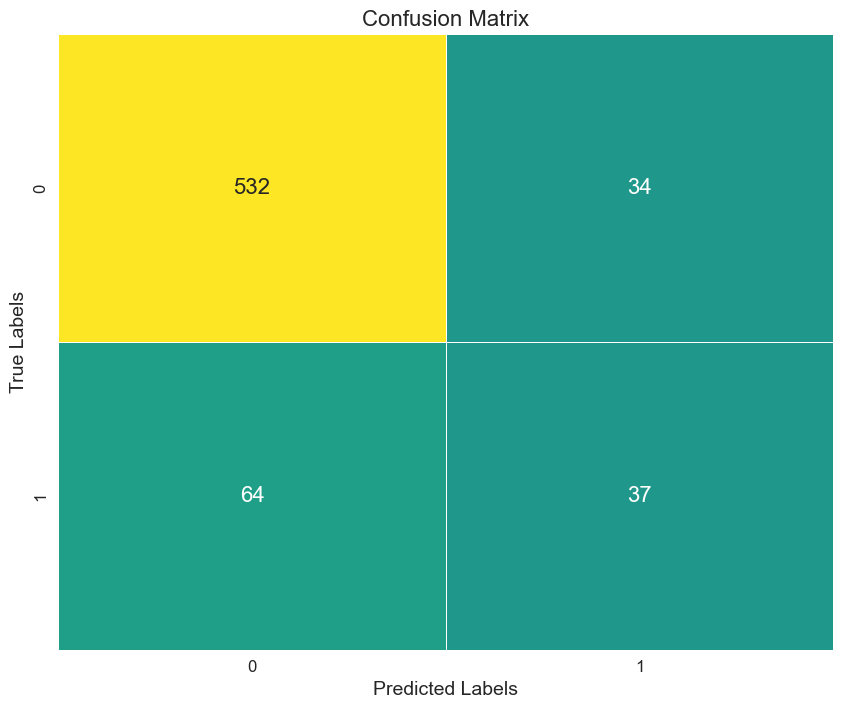

In [ ]:
# # Visualize your confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='viridis', cbar=False, center = 0, annot_kws={"size": 16})

# titles and labels
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


- There were 532 cases in which the True Negative was accurately predicted by the model.

- In 34 instances, the model incorrectly predicted the positive class (False, True).

- In 64 cases, the model mispredicted the negative class (True, False).

- In 37 cases, the model accurately predicted the positive class (True, True).

#### D) Receiver Operating Characteristic (ROC) Curve & AUC

In [ ]:
# Calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train_new, y_train).decision_function(X_test_new)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Print output
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.8216947136409755


- Model's AUC of 0.8217 indicates that it can accurately categorise cases as either positive or negative.

AUC: 0.8216947136409755


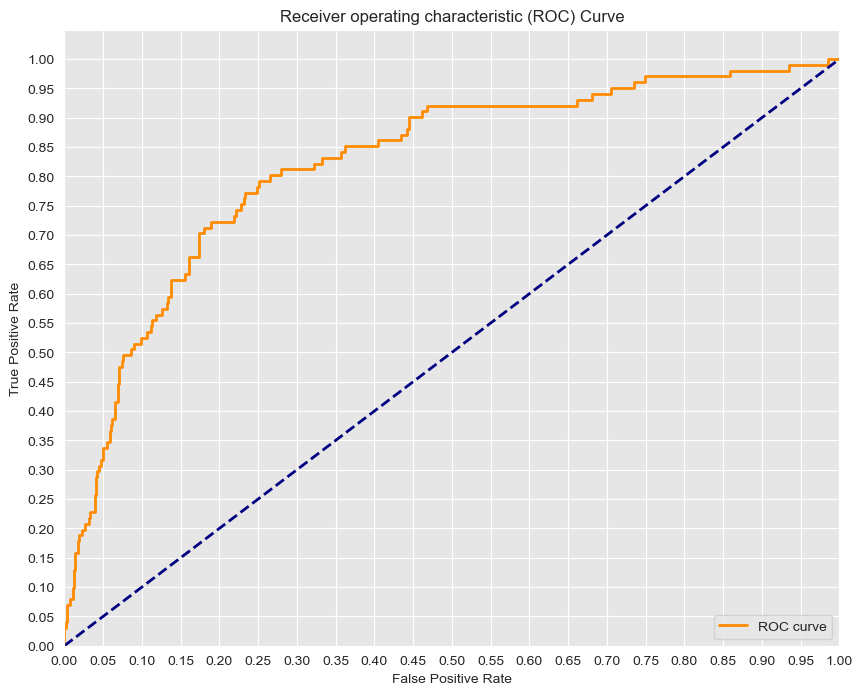

In [739]:
# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The classifier appears to be successful in differentiating between positive and negative classes, as indicated by the orange ROC curve being above the diagonal line.

#### E) Cross Validation

In [ ]:
# Applying Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train_new, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86516854 0.87640449 0.87640449 0.88389513 0.85393258 0.8576779
 0.84586466 0.85714286 0.84586466 0.87593985]


In [741]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8638


- The average score of 86.38% indicates that the model has a good average performance across the different folds of the cross-validation process.

- Our, original model score is found to be 0.8709. The average cross-validation score is 0.8638. So, we can conclude that cross-validation does not result in performance improvement.

#### Train and test score distributions with Cross-Validation

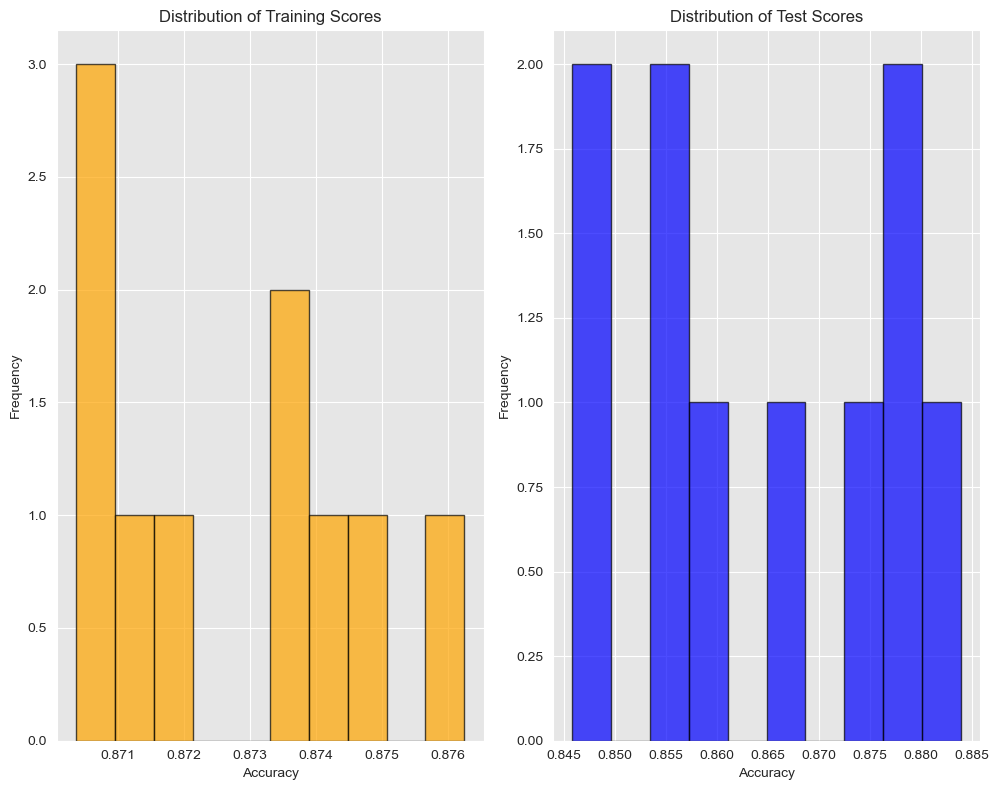

In [ ]:
# Do cross-validation for both both train and test scores
cv_results = cross_validate(logreg, X_train_new, y_train, cv=10, verbose=0,
                            return_train_score=True, scoring='accuracy')

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Plotting the distributions of train vs test scores
plt.figure(figsize=(10, 8))

# Plot histograms for training scores
plt.subplot(1, 2, 1)
plt.hist(train_scores, bins=10, alpha=0.7, color='orange', edgecolor='black', align='mid')
plt.title('Distribution of Training Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

# Plot histograms for testing scores
plt.subplot(1, 2, 2)
plt.hist(test_scores, bins=10, alpha=0.7, color='blue', edgecolor='black', align='mid')
plt.title('Distribution of Test Scores')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- As per the training score distribution histogram, there is a consistent performance on the training data is indicated by the training scores' close clustering between 0.871 and 0.876.

- The test score distribution histogram shows a slightly greater range of accuracy scores on the test data, from 0.85 to 0.89. In comparison to the training scores, the test scores are a little more dispersed.

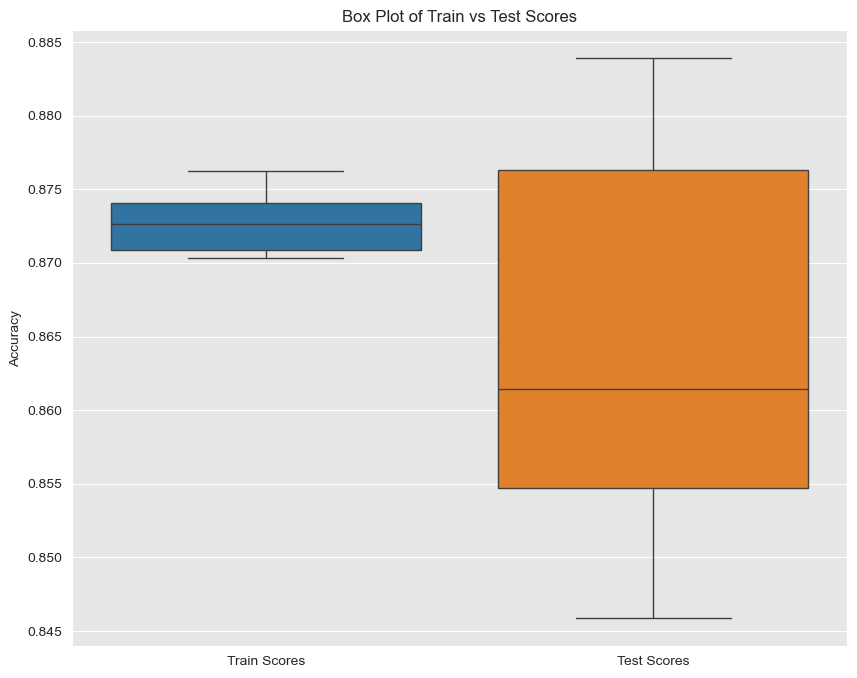

In [ ]:
# Box plot comparing train vs test scores
plt.figure(figsize=(10, 8))

# Combine train and test scores 
scores_df = pd.DataFrame({
    'Train Scores': train_scores,
    'Test Scores': test_scores
})

# Plot box plot
sns.boxplot(data=scores_df)
plt.title('Box Plot of Train vs Test Scores')
plt.ylabel('Accuracy')
plt.show()


- Performance on the training data is constant and reliable, as seen by the training scores' close clustering around a high median accuracy.

- With a marginally lower median accuracy and more variability in the test results, the model might be overfitting to some extent. 

### Conclusion

- In comparison to the test set, the training set's accuracy scores are a bit higher and more closely clustered. This shows that the logistic regression model generalises well to the test data and operates consistently on the training data.

- The logistic regression model appears to have a reasonable balance between bias and variance and is not overfitting, based on the slight variations between the training and test accuracy scores.

- Our, original model score is found to be 0.8709. The average cross-validation score is 0.8639. So, we can conclude that cross-validation does not result in performance improvement.

- Box plot analysis indicates that your model may be slightly overfitting the training data because of the greater consistency in training scores and a slight variability in test scores.

===
### To work on

In the classification chapter we have trained several different classifiers, including a Logistic Regression, a K-Nearest Neighbors Classifier, a Support-Vector Machine, a Decision Tree and a Random Forest. It was found that the best performance in accuracy, as well as f1-score and AUC is achieved by the Random Forest. One of the most important predictors for the Random Forest is the number of customer service calls. This might imply that the company should improve its customer service. Another important feature is the total day minutes and the total day charge, which basically hold the same information. So the company could try to either lower its charge per minute for clients, which have many day minutes or it could offer flat rates for calls.
Concluding, we suggest the Telecom company to use the Random Forest model to identify potential churn customers and according to the customers life-time value present them special offers.


The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

The model shows no signs of overfitting.

Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Increasing the threshold level results in increased accuracy.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.

===

#### Insights for further review

- Box plot analysis indicates that your model may be slightly overfitting the training data because of the greater consistency in training scores and a slight variability in test scores.

- Although the model works well with training data, it has to be enhanced to better generalise to test data.
